In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [157]:
empDepDF = pd.read_csv('./work/viikko3/datasets/emp-dep.csv')

# Tehtävä 1

<Axes: xlabel='age', ylabel='salary'>

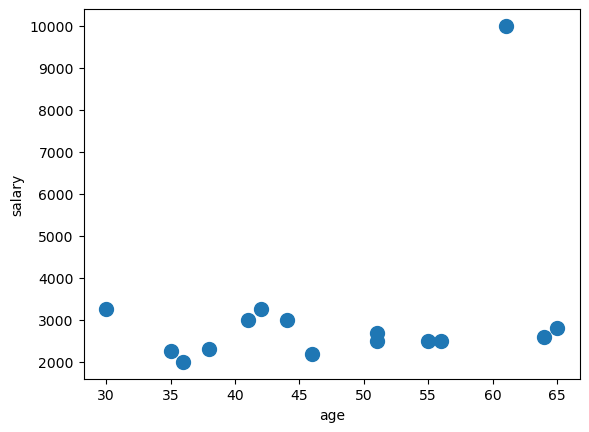

In [158]:
empDepDF.plot.scatter(x='age', y='salary', s=100)

<Axes: xlabel='dname'>

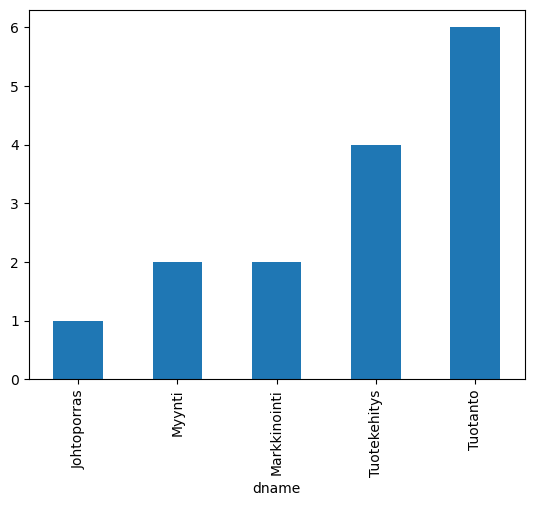

In [159]:
empDepDF['dname'].value_counts().sort_values().plot.bar()

<Axes: ylabel='dname'>

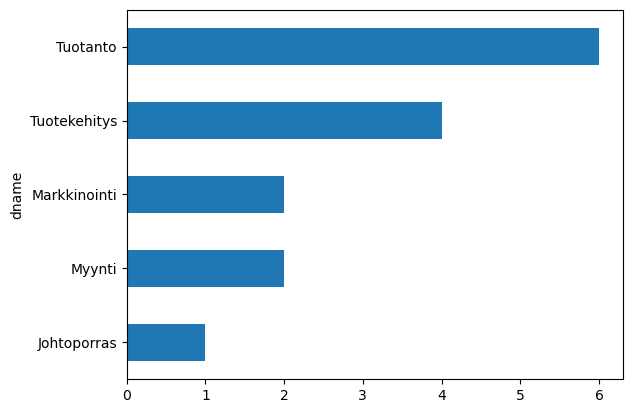

In [160]:
empDepDF['dname'].value_counts().sort_values().plot.barh()

## Tehtävä 2

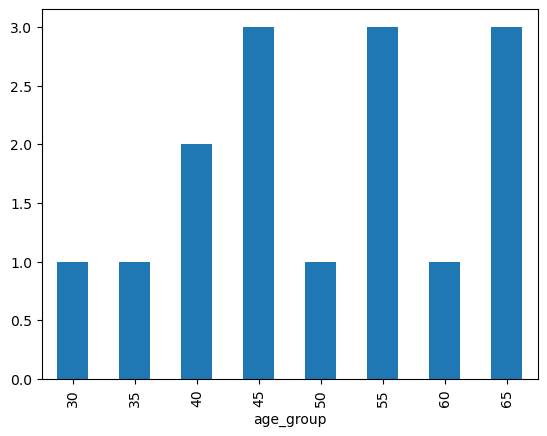

In [161]:
sorted_age = empDepDF['age_group'].value_counts().sort_index().plot.bar()

## Tehtävä 3

([<matplotlib.patches.Wedge at 0x7f09e0e7a550>,
 [Text(-0.5499998810780421, 0.9526280128224971, 'miehet'),
  Text(0.549999702695089, -0.9526281158118911, 'naiset')],
 [Text(-0.2999999351334775, 0.519615279721362, '66.7%'),
  Text(0.2999998378336849, -0.5196153358973951, '33.3%')])

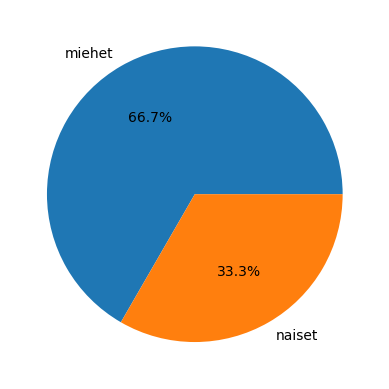

In [162]:
gender_counts = empDepDF['gender'].value_counts()

gender_mapping = {0: 'miehet', 1: 'naiset'}

gender_percentages = (gender_counts / gender_counts.sum()) * 100

gender_percentages.index = gender_percentages.index.map(gender_mapping)

plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%')

<Axes: xlabel='Ikäryhmä', ylabel='Lukumäärä'>

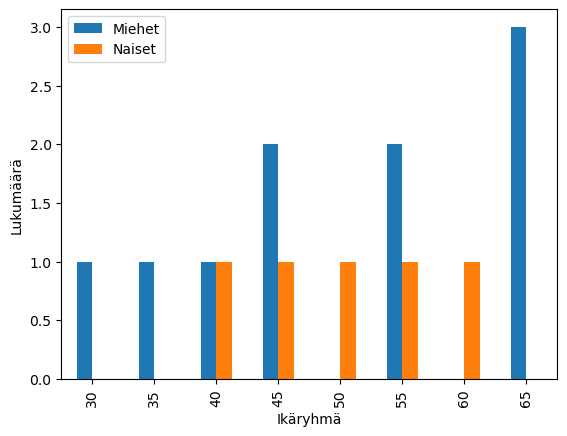

In [163]:
male_age_counts = empDepDF[empDepDF['gender'] == 0]['age_group'].value_counts()
female_age_counts = empDepDF[empDepDF['gender'] == 1]['age_group'].value_counts()

gender_counts_df = pd.DataFrame({'Miehet': male_age_counts, 'Naiset': female_age_counts}).fillna(0)

gender_counts_df.plot.bar(xlabel='Ikäryhmä', ylabel='Lukumäärä')

## Tehtävä 4

<Axes: xlabel='Age_group'>

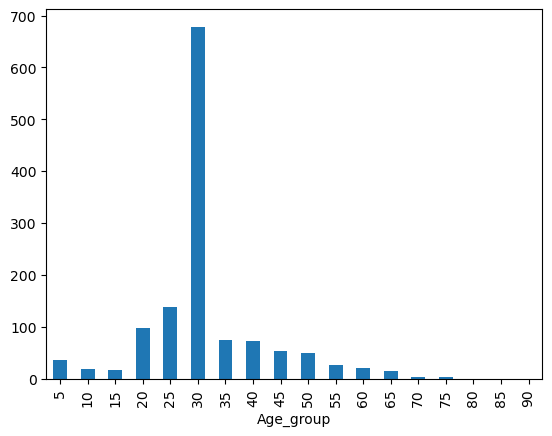

In [164]:
titanicDF = pd.read_csv('./work/viikko3/datasets/titanic.csv')

age_bins = range(0, 95, 5)

titanicDF['Age_group'] = pd.cut(titanicDF['Age'], bins=age_bins, labels=age_bins[1:])

titanicDF['Age_group'].value_counts().sort_index().plot.bar()

<Axes: title={'center': 'matkustajia: 1313\nselviytyneet miehet: 142\nselviytyneet naiset: 308'}, ylabel='Selviytyneet'>

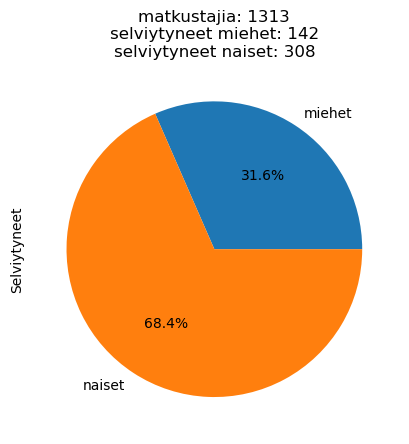

In [165]:
male_survived_counts = titanicDF[titanicDF['Gender'] == 'male']['Survived'].value_counts()

female_survived_counts = titanicDF[titanicDF['Gender'] == 'female']['Survived'].value_counts()

gender_survived_counts_df = pd.DataFrame({'miehet': male_survived_counts, 'naiset': female_survived_counts})

gender_survived_percentages = (gender_survived_counts_df.iloc[1] / gender_survived_counts_df.iloc[1].sum()) * 100

gender_survived_percentages.plot.pie(ylabel='Selviytyneet',
                                    autopct='%1.1f%%',
                                    title=f'matkustajia: {titanicDF.shape[0]}\nselviytyneet miehet: {gender_survived_counts_df.iloc[1, 0]}\nselviytyneet naiset: {gender_survived_counts_df.iloc[1, 1]}'
                                    )

In [166]:
titanicDF = titanicDF[titanicDF['PClass'] != '*']

saved_mapping = {0: 'no', 1: 'yes'}
titanicDF['Saved'] = titanicDF['Survived'].map(saved_mapping)

<Axes: xlabel='PClass', ylabel='Age'>

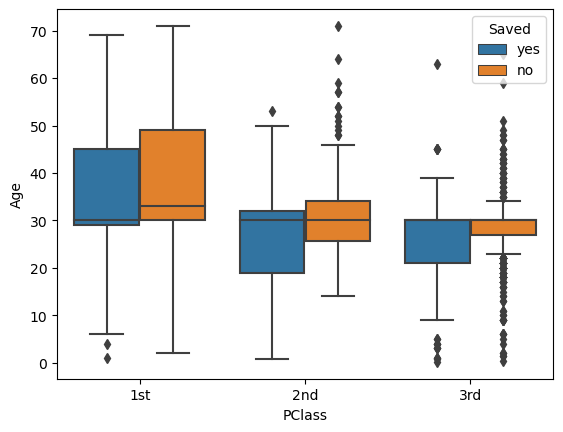

In [167]:
sb.boxplot(data=titanicDF['Saved'], x=titanicDF['PClass'], y=titanicDF['Age'], hue=titanicDF['Saved'])

Text(0.5, 1.0, 'females')

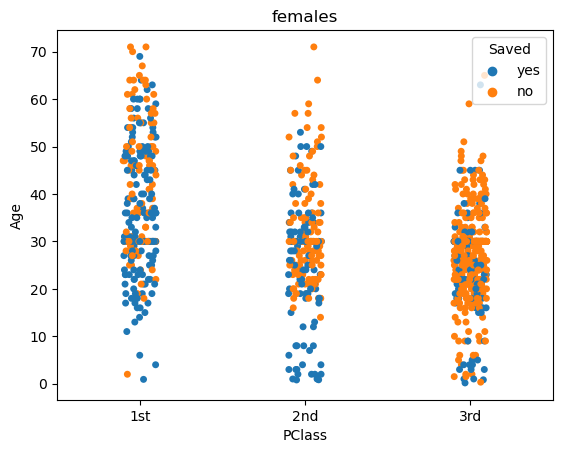

In [168]:
sb.stripplot(data=titanicDF[titanicDF['Gender'] == 'female']['Saved'],  x=titanicDF['PClass'], y=titanicDF['Age'], hue=titanicDF['Saved'])
plt.title("females")

Text(0.5, 1.0, 'males')

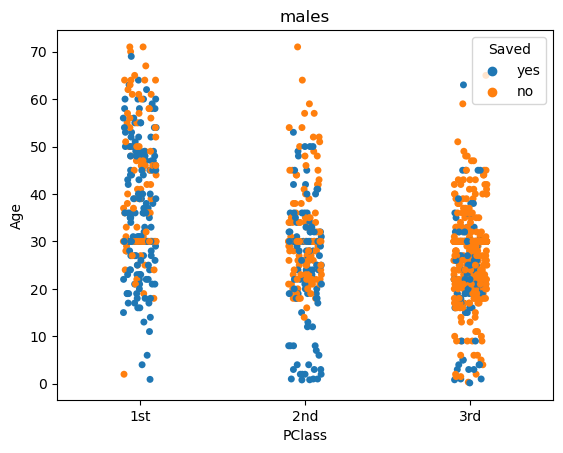

In [169]:
sb.stripplot(data=titanicDF[titanicDF['Gender'] == 'male']['Saved'],  x=titanicDF['PClass'], y=titanicDF['Age'], hue=titanicDF['Saved'])
plt.title("males")